### 1. Импорт библиотек и подготовка датафрейма:

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(16,10)}, style = "whitegrid")

In [2]:
def generate_dataframe(start_date, end_date):
    # Вычисляем количество дней между начальной и конечной датами
    num_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

    df = pd.DataFrame({
        'date': pd.date_range(start=start_date, end=end_date),
        'sales': [random.randint(10, 10000) for _ in range(num_days)],
        'visitors': [random.randint(10, 10000) for _ in range(num_days)],
    })

    # преобразуем столбец date в тип данных datetime
    df['date'] = pd.to_datetime(df['date'])

    # добавляем столбец с прибылью
    df['revenue'] = df['sales'] * [random.randint(10, 100) for _ in range(num_days)]

    # добавляем столбец с маркетинговыми затратами
    df['marketing_costs'] = np.round(df['visitors'] * [random.uniform(1, 2) for _ in range(num_days)], 2)

    # добавляем столбец с иными затратами
    df['other_costs'] = np.round(df['revenue'] / [random.uniform(2, 10) for _ in range(num_days)], 2)

    # добавляем столбец с процентом конверсии посетителей в покупателей
    df['conversion_rate'] = np.round(df['sales'] / df['visitors'], 2)

    # добавляем столбец с доходом
    df['profit'] = df['revenue'] - df['marketing_costs'] - df['other_costs']

    return df


# Использованиe функции
start_date = '2020-01-01'
end_date = '2023-12-31'
a_group = generate_dataframe(start_date, end_date)
b_group = generate_dataframe(start_date, end_date)
c_group = generate_dataframe(start_date, end_date)

# Добавление столбца 'group' в каждый датафрейм
a_group['group'] = 'a'
b_group['group'] = 'b'
c_group['group'] = 'c'

# Создание датафрейма с уникальными датами
dates_df = pd.DataFrame({'date': pd.date_range(start=start_date, end=end_date)})

# Объединение данных с датафреймом уникальных дат
df = pd.merge(dates_df, pd.concat([a_group, b_group, c_group]), on='date', how='left')

# Печать объединенного датафрейма
df

,date,sales,visitors,revenue,marketing_costs,other_costs,conversion_rate,profit,group
0,2020-01-01,8571,561,342840,834.32,34573.59,15.28,307432.09,a
1,2020-01-01,6555,9468,609615,11421.80,103442.47,0.69,494750.73,b
2,2020-01-01,7003,2414,112048,3506.09,14396.53,2.90,94145.38,c
3,2020-01-02,4712,840,466488,1551.30,77072.99,5.61,387863.71,a
4,2020-01-02,890,6357,51620,7488.31,5381.12,0.14,38750.57,b
...,...,...,...,...,...,...,...,...,...
4378,2023-12-30,9454,1955,529424,2925.14,126266.41,4.84,400232.45,b
4379,2023-12-30,2950,6802,268450,11812.91,54940.87,0.43,201696.22,c
4380,2023-12-31,5993,2853,173797,4156.42,21707.24,2.10,147933.34,a
4381,2023-12-31,6499,9456,84487,10697.27,8973.87,0.69,64815.86,b


### 2. Задания к датафрейму:

1) Группировка прибыли по дням
2) Группировка прибыли по неделям
3) Группировка прибыли по месяцам
4) Группировка прибыли по кварталам
5) Группировка прибыли по годам
6) Группировка продаж по дням
7) Группировка продаж по неделям
8) Группировка продаж по месяцам
9) Группировка продаж по кварталам
10) Группировка продаж по годам

#### 1. Группировка данных по дням

In [3]:
# Функция подсчета лучшего дня
def count_best_days(df):
    # Группировка данных по дате и группе
    grouped = df.groupby(['date', 'group'])

    # Вычисление суммы продаж для каждой группы в каждый день
    daily_profit = grouped['profit'].sum().reset_index()

    # Определение лучшей группы в каждый день
    best_group_each_day = daily_profit.loc[daily_profit.groupby('date').profit.idxmax()]

    # Подсчет количества дней для каждой группы
    best_days_count = best_group_each_day['group'].value_counts()

    return best_days_count

# Использование функции
best_days_count = count_best_days(df)

# Вывод результатов
print("\nКоличество дней, в которые каждая группа была лучшей:\n")
for group, count in best_days_count.items():
    print(f"Группа {group}: {count} день(дней)")


Количество дней, в которые каждая группа была лучшей:

Группа a: 501 день(дней)
Группа c: 481 день(дней)
Группа b: 479 день(дней)


#### 2. Группировка данных по неделям

In [4]:
# Функция подсчета лучшей недели
def count_best_weeks(df):
    # Группировка данных по неделям и группам
    grouped = df.groupby([pd.Grouper(key='date', freq='W'), 'group'])

    # Вычисление суммы продаж для каждой группы в каждую неделю
    weekly_profit = grouped['profit'].sum().reset_index()

    # Определение лучшей группы в каждую неделю
    best_group_each_week = weekly_profit.loc[weekly_profit.groupby('date').profit.idxmax()]

    # Подсчет количества недель для каждой группы
    best_weeks_count = best_group_each_week['group'].value_counts()

    return best_weeks_count

# Использование функции
best_weeks_count = count_best_weeks(df)

# Вывод результатов
print("\nКоличество недель, в которые каждая группа была лучшей:\n")
for group, count in best_weeks_count.items():
    print(f"Группа {group}: {count} недель(ля)")


Количество недель, в которые каждая группа была лучшей:

Группа a: 75 недель(ля)
Группа c: 74 недель(ля)
Группа b: 60 недель(ля)


#### 3. Группировка данных по месяцам

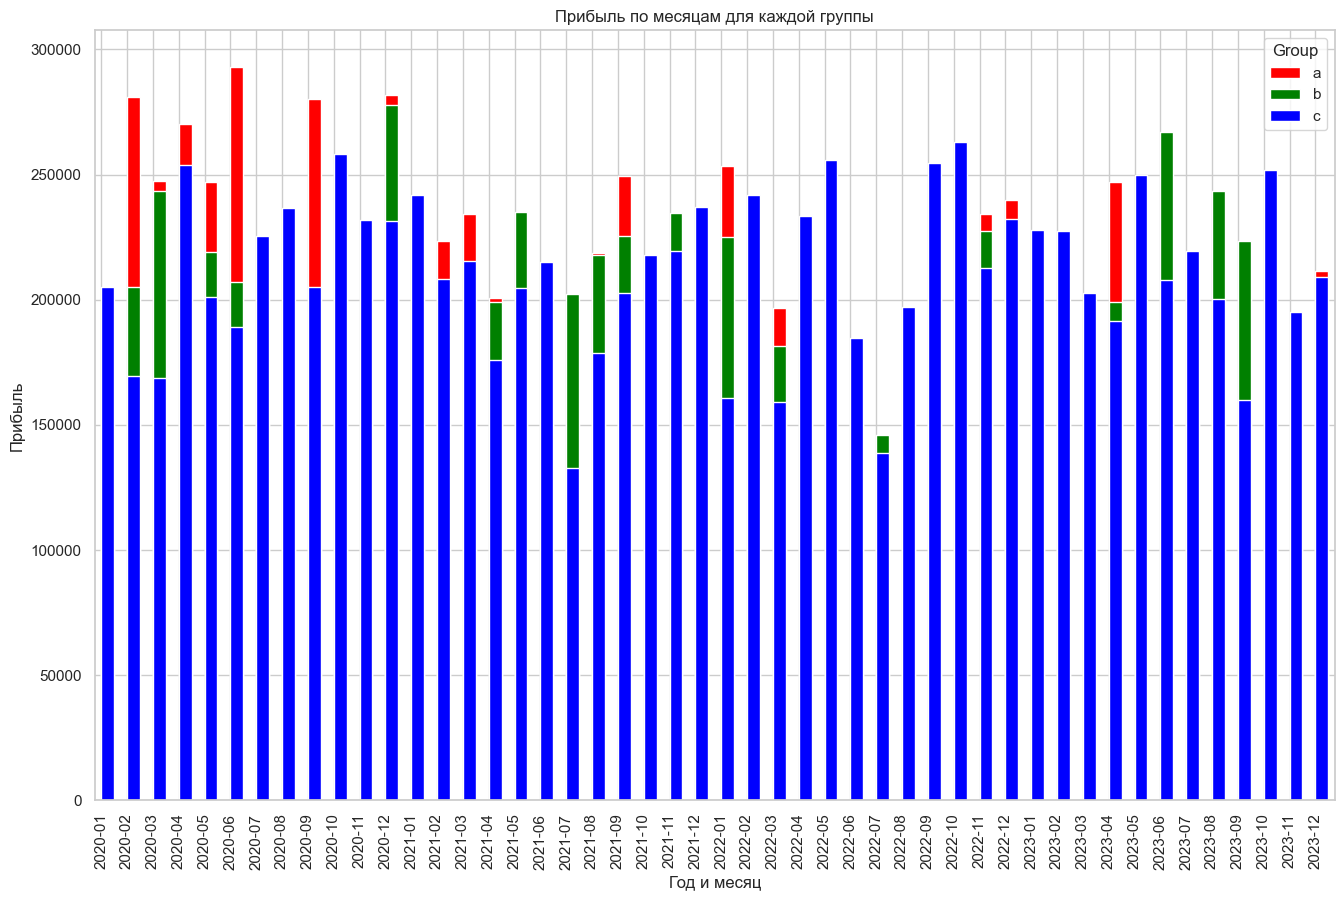


Количество месяцев, в которых каждая группа была лучшей:

Группа c: 23 месяца(ев)
Группа a: 19 месяца(ев)
Группа b: 6 месяца(ев)


In [5]:
# Функция подсчета лучшего месяца
def count_best_months(df):
    # Группировка данных по месяцам и группам
    grouped = df.groupby([df['date'].dt.to_period('M'), 'group'])

    # Вычисление суммы продаж для каждой группы в каждом месяце
    monthly_profit = grouped['profit'].sum().reset_index()

    # Определение лучшей группы в каждом месяце
    best_group_each_month = monthly_profit.loc[monthly_profit.groupby('date').profit.idxmax()]

    # Подсчет количества месяцев для каждой группы
    best_months_count = best_group_each_month['group'].value_counts()

    return best_months_count

# Создание копии датафрейма без столбца 'group'
df_group = df.copy()

# Группировка данных по неделям и расчет средних значений без учета столбца 'group'
df_weekly_a = np.round(df_group
                     .query('group == "a"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='M'))
                     .mean()
                     .reset_index(), 2)

df_weekly_b = np.round(df_group
                     .query('group == "b"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='M'))
                     .mean()
                     .reset_index(), 2)

df_weekly_c = np.round(df_group
                     .query('group == "c"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='M'))
                     .mean()
                     .reset_index(), 2)

# Создание объекта для построения графика
fig, ax = plt.subplots()

# Построение графиков для каждой группы
df_weekly_a.set_index('date')['profit'].plot(kind='bar', color='red', ax=ax, position=0, label='a')
df_weekly_b.set_index('date')['profit'].plot(kind='bar', color='green', ax=ax, position=0, label='b')
df_weekly_c.set_index('date')['profit'].plot(kind='bar', color='blue', ax=ax, position=0, label='c')

# Добавление легенды
plt.legend(title='Group')
plt.title('Прибыль по месяцам для каждой группы')
plt.xlabel('Год и месяц')
plt.ylabel('Прибыль')

# Преобразование даты в строку с помощью strftime
ax.set_xticklabels([x.strftime('%Y-%m') for x in df_weekly_a['date']])

# Отображение графика
plt.show()

# Использование функции
best_months_count = count_best_months(df)

# Вывод результатов
print("\nКоличество месяцев, в которых каждая группа была лучшей:\n")
for group, count in best_months_count.items():
    print(f"Группа {group}: {count} месяца(ев)")

#### 4. Группировка данных по кварталам

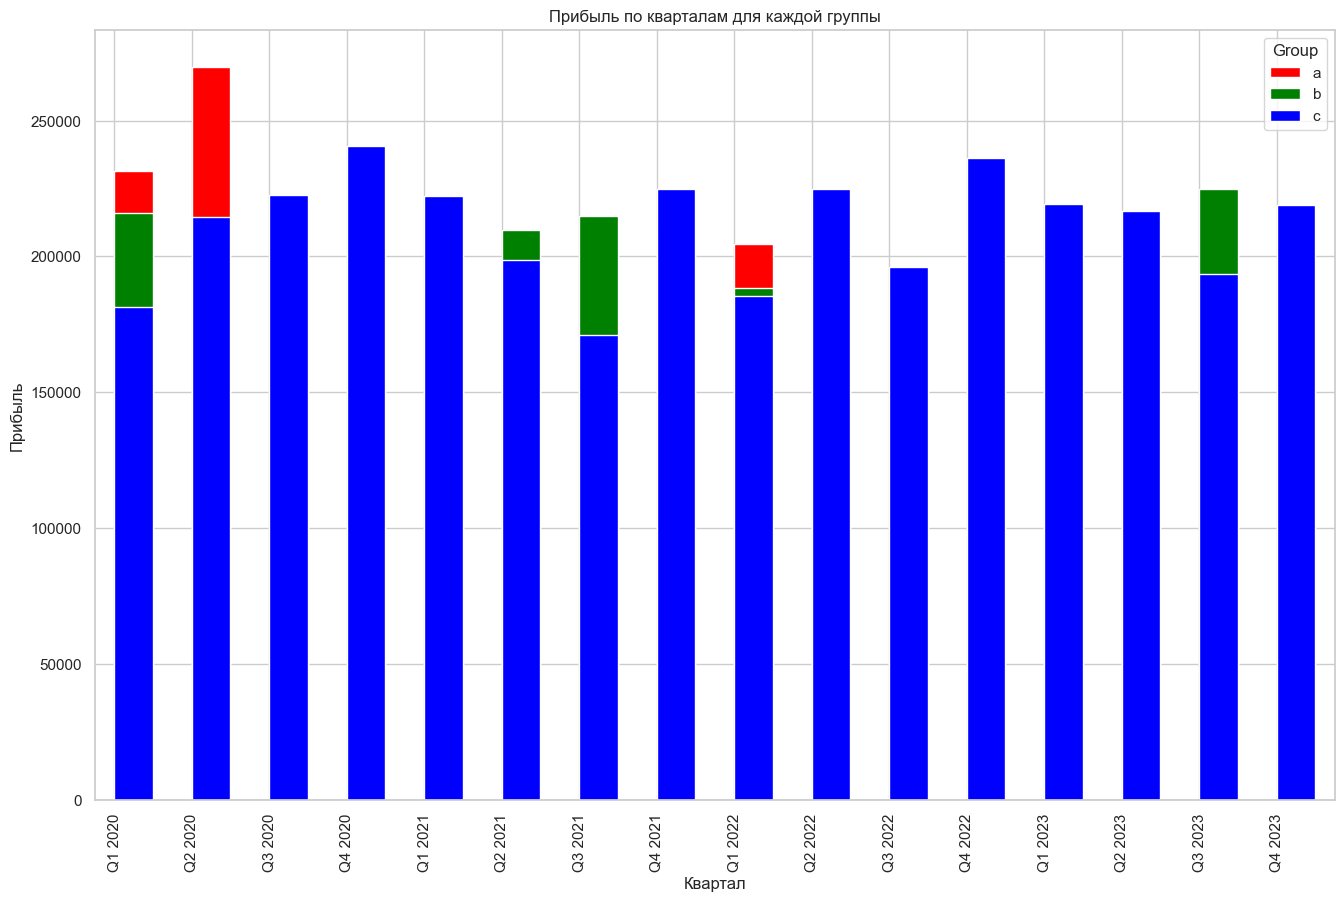


Количество кварталов, в которые каждая группа была лучшей:

Группа c: 10 квартал(ов)
Группа a: 3 квартал(ов)
Группа b: 3 квартал(ов)


In [6]:
# Функция подсчета лучшего квартала
def count_best_quarters(df):
    # Группировка данных по кварталам и группам
    grouped = df.groupby([df['date'].dt.to_period('Q'), 'group'])

    # Вычисление суммы продаж для каждой группы в каждом квартале
    quarterly_profit = grouped['profit'].sum().reset_index()

    # Определение лучшей группы в каждом квартале
    best_group_each_quarter = quarterly_profit.loc[quarterly_profit.groupby('date').profit.idxmax()]

    # Подсчет количества кварталов для каждой группы
    best_quarters_count = best_group_each_quarter['group'].value_counts()

    return best_quarters_count

# Создание копии датафрейма без столбца 'group'
df_group = df.copy()

# Группировка данных по кварталам и расчет средних значений без учета столбца 'group'
df_quarterly_a = np.round(df_group
                     .query('group == "a"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Q'))
                     .mean()
                     .reset_index(), 2)

df_quarterly_b = np.round(df_group
                     .query('group == "b"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Q'))
                     .mean()
                     .reset_index(), 2)

df_quarterly_c = np.round(df_group
                     .query('group == "c"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Q'))
                     .mean()
                     .reset_index(), 2)

# Создание объекта для построения графика
fig, ax = plt.subplots()

# Построение графиков для каждой группы
df_quarterly_a.set_index('date')['profit'].plot(kind='bar', color='red', ax=ax, position=0, label='a')
df_quarterly_b.set_index('date')['profit'].plot(kind='bar', color='green', ax=ax, position=0, label='b')
df_quarterly_c.set_index('date')['profit'].plot(kind='bar', color='blue', ax=ax, position=0, label='c')

# Добавление легенды
plt.legend(title='Group')
plt.title('Прибыль по кварталам для каждой группы')
plt.xlabel('Квартал')
plt.ylabel('Прибыль')

# Преобразование даты в строку с помощью strftime
ax.set_xticklabels([f"Q{x.quarter} {x.year}" for x in df_quarterly_a['date']])

# Отображение графика
plt.show()

# Использование функции
best_quarters_count = count_best_quarters(df)

# Вывод результатов
print("\nКоличество кварталов, в которые каждая группа была лучшей:\n")
for group, count in best_quarters_count.items():
    print(f"Группа {group}: {count} квартал(ов)")

#### 5. Группировка данных по годам

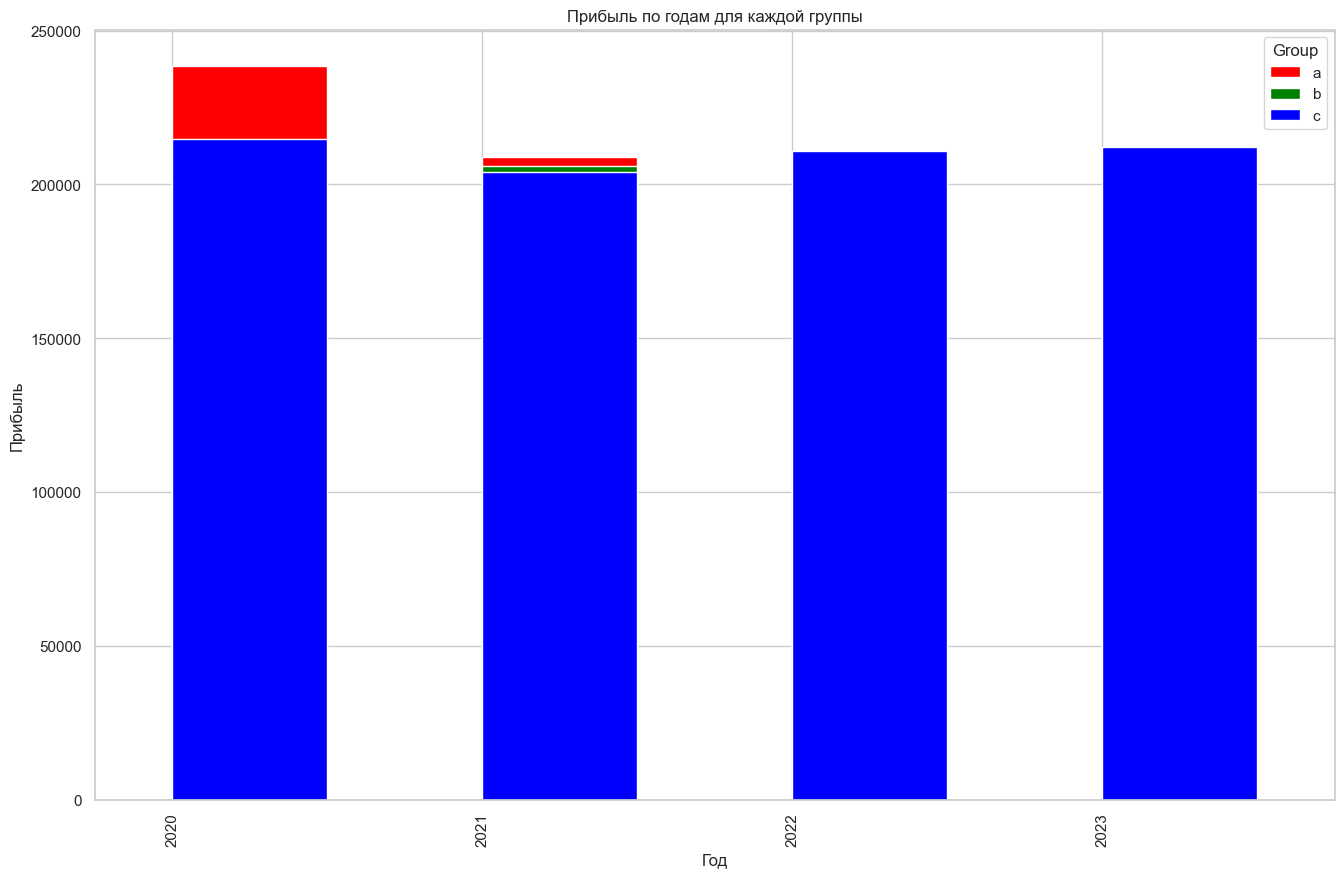


Количество лет, в которые каждая группа была лучшей:

Группа a: 2 год(а) / лет
Группа c: 2 год(а) / лет


In [7]:
# Функция подсчета лучшего года
def count_best_years(df):
    # Группировка данных по годам и группам
    grouped = df.groupby([df['date'].dt.year, 'group'])

    # Вычисление суммы продаж для каждой группы в каждом году
    yearly_profit = grouped['profit'].sum().reset_index()

    # Определение лучшей группы в каждом году
    best_group_each_year = yearly_profit.loc[yearly_profit.groupby('date').profit.idxmax()]

    # Подсчет количества лет для каждой группы
    best_years_count = best_group_each_year['group'].value_counts()

    return best_years_count

# Создание копии датафрейма без столбца 'group'
df_group = df.copy()

# Группировка данных по годам и расчет средних значений без учета столбца 'group'
df_yearly_a = np.round(df_group
                     .query('group == "a"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Y'))
                     .mean()
                     .reset_index(), 2)

df_yearly_b = np.round(df_group
                     .query('group == "b"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Y'))
                     .mean()
                     .reset_index(), 2)

df_yearly_c = np.round(df_group
                     .query('group == "c"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Y'))
                     .mean()
                     .reset_index(), 2)

# Создание объекта для построения графика
fig, ax = plt.subplots()

# Построение графиков для каждой группы
df_yearly_a.set_index('date')['profit'].plot(kind='bar', color='red', ax=ax, position=0, label='a')
df_yearly_b.set_index('date')['profit'].plot(kind='bar', color='green', ax=ax, position=0, label='b')
df_yearly_c.set_index('date')['profit'].plot(kind='bar', color='blue', ax=ax, position=0, label='c')

# Добавление легенды
plt.legend(title='Group')
plt.title('Прибыль по годам для каждой группы')
plt.xlabel('Год')
plt.ylabel('Прибыль')

# Преобразование даты в строку с помощью strftime
ax.set_xticklabels([x.strftime('%Y') for x in df_yearly_a['date']])

# Отображение графика
plt.show()

# Использование функции
best_years_count = count_best_years(df)

# Вывод результатов
print("\nКоличество лет, в которые каждая группа была лучшей:\n")
for group, count in best_years_count.items():
    print(f"Группа {group}: {count} год(а) / лет")

#### 6. Группировка продаж по дням

In [8]:
# Функция подсчета лучшего дня
def count_best_days(df):
    # Группировка данных по дате и группе
    grouped = df.groupby(['date', 'group'])

    # Вычисление суммы продаж для каждой группы в каждый день
    daily_sales = grouped['sales'].sum().reset_index()

    # Определение лучшей группы в каждый день
    best_group_each_day = daily_sales.loc[daily_sales.groupby('date').sales.idxmax()]

    # Подсчет количества дней для каждой группы
    best_days_count = best_group_each_day['group'].value_counts()

    return best_days_count

# Использование функции
best_days_count = count_best_days(df)

# Вывод результатов
print("\nКоличество дней, в которые каждая группа была лучшей:\n")
for group, count in best_days_count.items():
    print(f"Группа {group}: {count} дней")


Количество дней, в которые каждая группа была лучшей:

Группа a: 495 дней
Группа c: 492 дней
Группа b: 474 дней


#### 7. Группировка продаж по неделям

In [9]:
# Функция подсчета лучшей недели
def count_best_weeks(df):
    # Группировка данных по неделям и группам
    grouped = df.groupby([pd.Grouper(key='date', freq='W'), 'group'])

    # Вычисление суммы продаж для каждой группы в каждую неделю
    weekly_sales = grouped['profit'].sum().reset_index()

    # Определение лучшей группы в каждую неделю
    best_group_each_week = weekly_sales.loc[weekly_sales.groupby('date').profit.idxmax()]

    # Подсчет количества недель для каждой группы
    best_weeks_count = best_group_each_week['group'].value_counts()

    return best_weeks_count

# Использование функции
best_weeks_count = count_best_weeks(df)

# Вывод результатов
print("\nКоличество недель, в которые каждая группа была лучшей:\n")
for group, count in best_weeks_count.items():
    print(f"Группа {group}: {count} недель")


Количество недель, в которые каждая группа была лучшей:

Группа a: 75 недель
Группа c: 74 недель
Группа b: 60 недель


#### 8. Группировка продаж по месяцам

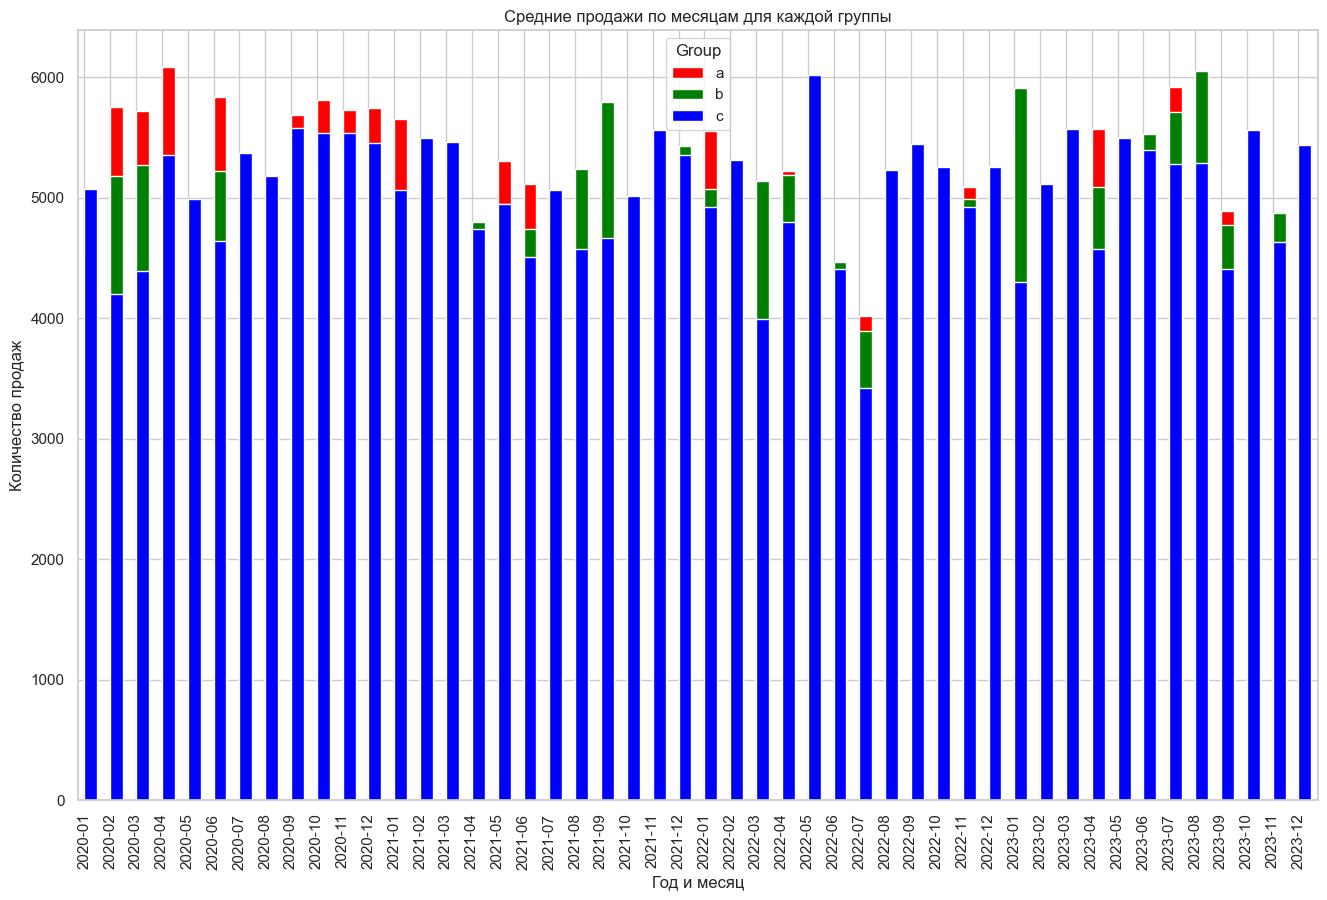


Количество месяцев, в которых каждая группа была лучшей:

Группа c: 19 месяцев
Группа a: 19 месяцев
Группа b: 10 месяцев


In [10]:
# Функция подсчета лучшего месяца
def count_best_months(df):
    # Группировка данных по месяцам и группам
    grouped = df.groupby([df['date'].dt.to_period('M'), 'group'])

    # Вычисление суммы продаж для каждой группы в каждом месяце
    monthly_profit = grouped['sales'].sum().reset_index()

    # Определение лучшей группы в каждом месяце
    best_group_each_month = monthly_profit.loc[monthly_profit.groupby('date').sales.idxmax()]

    # Подсчет количества месяцев для каждой группы
    best_months_count = best_group_each_month['group'].value_counts()

    return best_months_count

# Создание копии датафрейма без столбца 'group'
df_group = df.copy()

# Группировка данных по неделям и расчет средних значений без учета столбца 'group'
df_weekly_a = np.round(df_group
                     .query('group == "a"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='M'))
                     .mean()
                     .reset_index(), 2)

df_weekly_b = np.round(df_group
                     .query('group == "b"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='M'))
                     .mean()
                     .reset_index(), 2)

df_weekly_c = np.round(df_group
                     .query('group == "c"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='M'))
                     .mean()
                     .reset_index(), 2)

# Создание объекта для построения графика
fig, ax = plt.subplots()

# Построение графиков для каждой группы
df_weekly_a.set_index('date')['sales'].plot(kind='bar', color='red', ax=ax, position=0, label='a')
df_weekly_b.set_index('date')['sales'].plot(kind='bar', color='green', ax=ax, position=0, label='b')
df_weekly_c.set_index('date')['sales'].plot(kind='bar', color='blue', ax=ax, position=0, label='c')

# Добавление легенды
plt.legend(title='Group')
plt.title('Средние продажи по месяцам для каждой группы')
plt.xlabel('Год и месяц')
plt.ylabel('Количество продаж')

# Преобразование даты в строку с помощью strftime
ax.set_xticklabels([x.strftime('%Y-%m') for x in df_weekly_a['date']])

# Отображение графика
plt.show()

# Использование функции
best_months_count = count_best_months(df)

# Вывод результатов
print("\nКоличество месяцев, в которых каждая группа была лучшей:\n")
for group, count in best_months_count.items():
    print(f"Группа {group}: {count} месяцев")

#### 9. Группировка продаж по кварталам

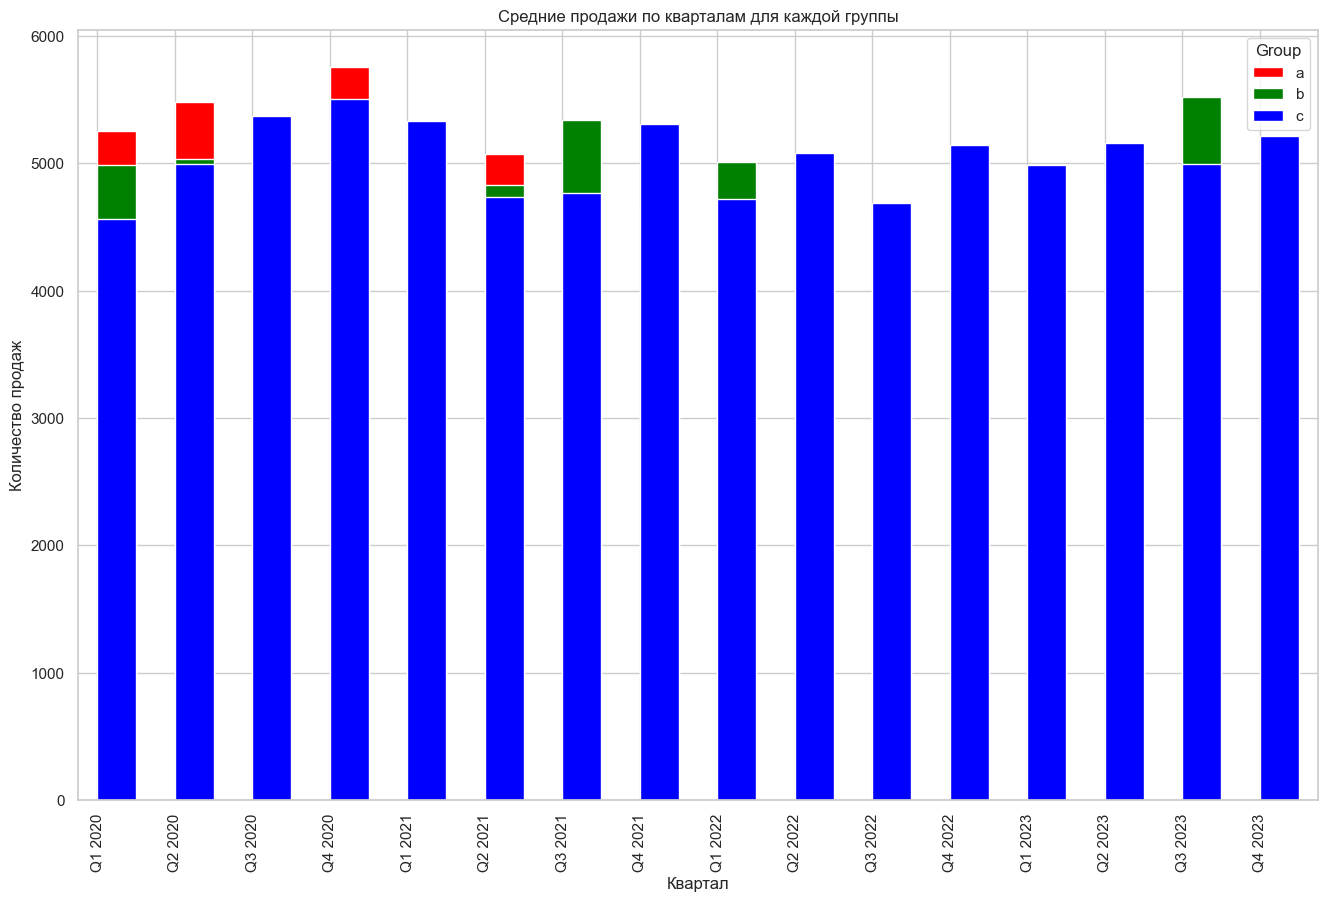


Количество кварталов, в которые каждая группа была лучшей:

Группа c: 9 квартал(ов)
Группа a: 4 квартал(ов)
Группа b: 3 квартал(ов)


In [11]:
# Функция подсчета лучшего квартала
def count_best_quarters(df):
    # Группировка данных по кварталам и группам
    grouped = df.groupby([df['date'].dt.to_period('Q'), 'group'])

    # Вычисление суммы продаж для каждой группы в каждом квартале
    quarterly_sales = grouped['sales'].sum().reset_index()

    # Определение лучшей группы в каждом квартале
    best_group_each_quarter = quarterly_sales.loc[quarterly_sales.groupby('date').sales.idxmax()]

    # Подсчет количества кварталов для каждой группы
    best_quarters_count = best_group_each_quarter['group'].value_counts()

    return best_quarters_count

# Создание копии датафрейма без столбца 'group'
df_group = df.copy()

# Группировка данных по кварталам и расчет средних значений без учета столбца 'group'
df_quarterly_a = np.round(df_group
                     .query('group == "a"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Q'))
                     .mean()
                     .reset_index(), 2)

df_quarterly_b = np.round(df_group
                     .query('group == "b"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Q'))
                     .mean()
                     .reset_index(), 2)

df_quarterly_c = np.round(df_group
                     .query('group == "c"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Q'))
                     .mean()
                     .reset_index(), 2)

# Создание объекта для построения графика
fig, ax = plt.subplots()

# Построение графиков для каждой группы
df_quarterly_a.set_index('date')['sales'].plot(kind='bar', color='red', ax=ax, position=0, label='a')
df_quarterly_b.set_index('date')['sales'].plot(kind='bar', color='green', ax=ax, position=0, label='b')
df_quarterly_c.set_index('date')['sales'].plot(kind='bar', color='blue', ax=ax, position=0, label='c')

# Добавление легенды
plt.legend(title='Group')
plt.title('Средние продажи по кварталам для каждой группы')
plt.xlabel('Квартал')
plt.ylabel('Количество продаж')

# Преобразование даты в строку с помощью strftime
ax.set_xticklabels([f"Q{x.quarter} {x.year}" for x in df_quarterly_a['date']])

# Отображение графика
plt.show()

# Использование функции
best_quarters_count = count_best_quarters(df)

# Вывод результатов
print("\nКоличество кварталов, в которые каждая группа была лучшей:\n")
for group, count in best_quarters_count.items():
    print(f"Группа {group}: {count} квартал(ов)")

#### 10. Группировка продаж по годам

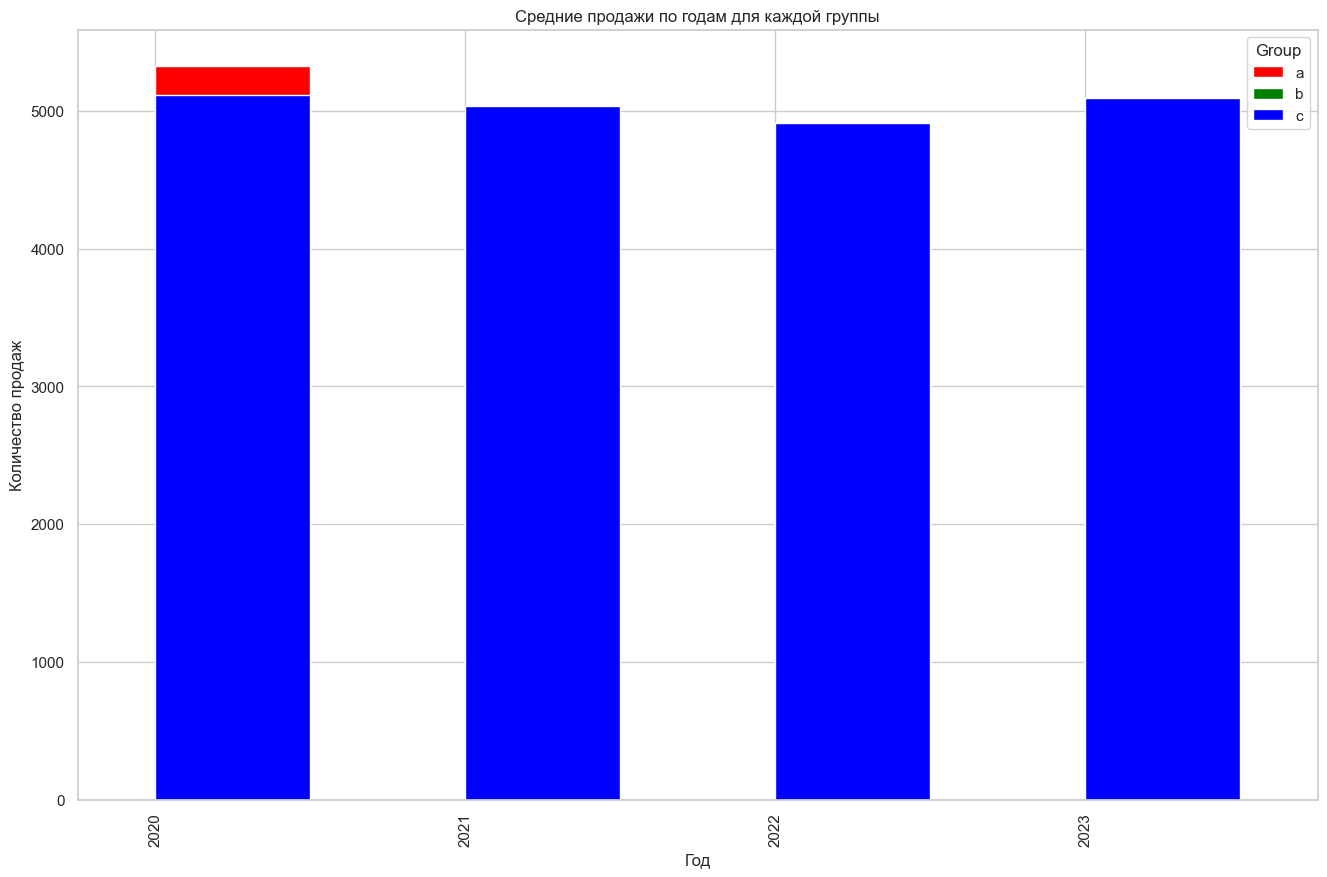


Количество лет, в которые каждая группа была лучшей:

Группа c: 3 год(а) / лет
Группа a: 1 год(а) / лет


In [12]:
# Функция подсчета лучшего года
def count_best_years(df):
    # Группировка данных по годам и группам
    grouped = df.groupby([df['date'].dt.year, 'group'])

    # Вычисление суммы продаж для каждой группы в каждом году
    yearly_sales = grouped['sales'].sum().reset_index()

    # Определение лучшей группы в каждом году
    best_group_each_year = yearly_sales.loc[yearly_sales.groupby('date').sales.idxmax()]

    # Подсчет количества лет для каждой группы
    best_years_count = best_group_each_year['group'].value_counts()

    return best_years_count

# Создание копии датафрейма без столбца 'group'
df_group = df.copy()

# Группировка данных по годам и расчет средних значений без учета столбца 'group'
df_yearly_a = np.round(df_group
                     .query('group == "a"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Y'))
                     .mean()
                     .reset_index(), 2)

df_yearly_b = np.round(df_group
                     .query('group == "b"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Y'))
                     .mean()
                     .reset_index(), 2)

df_yearly_c = np.round(df_group
                     .query('group == "c"')
                     .drop(columns=['group'])
                     .groupby(pd.Grouper(key='date', freq='Y'))
                     .mean()
                     .reset_index(), 2)

# Создание объекта для построения графика
fig, ax = plt.subplots()

# Построение графиков для каждой группы
df_yearly_a.set_index('date')['sales'].plot(kind='bar', color='red', ax=ax, position=0, label='a')
df_yearly_b.set_index('date')['sales'].plot(kind='bar', color='green', ax=ax, position=0, label='b')
df_yearly_c.set_index('date')['sales'].plot(kind='bar', color='blue', ax=ax, position=0, label='c')

# Добавление легенды
plt.legend(title='Group')
plt.title('Средние продажи по годам для каждой группы')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

# Преобразование даты в строку с помощью strftime
ax.set_xticklabels([x.strftime('%Y') for x in df_yearly_a['date']])

# Отображение графика
plt.show()

# Использование функции
best_years_count = count_best_years(df)

# Вывод результатов
print("\nКоличество лет, в которые каждая группа была лучшей:\n")
for group, count in best_years_count.items():
    print(f"Группа {group}: {count} год(а) / лет")